## climate-genome data regression

I will use as a reference [scikit](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) and [sci-py lectures](http://www.scipy-lectures.org/packages/statistics/index.html)

In [53]:
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [8]:
clim_kg = open('/Users/DValenzano/Dropbox/papers/Genomes_Ray/Koppen-Geiger/data/bioclimate_koeppengeiger.csv', 'rU').read()

In [15]:
clim_kga = np.array([i.split(',') for i in clim_kg.split('\n')]) #turn the csv file in an array

In [23]:
import pandas

In [29]:
data = pandas.read_csv('/Users/DValenzano/Dropbox/papers/Genomes_Ray/Koppen-Geiger/data/bioclimate_koeppengeiger_2.csv', sep=',', na_values="NA")

In [31]:
data2 = data.loc[data['Africa'] == 'Y']

In [32]:
data2

,Species,Genus,Annual,Log_GenomeSize,Log_GenomeSize_nowarning,GenomeSize,GenomeSizen_nowarning,GenomeSize_BUSCO,bioclim_bio_1,bioclim_bio_2,...,bioclim_bio_14,bioclim_bio_15,bioclim_bio_16,bioclim_bio_17,bioclim_bio_18,bioclim_bio_19,median_relax_k,KG,KG1,Africa
0,X4FGR,Fundulopanchax,SemiAnnual,20.603920,20.603920,888000000,888000000,1.341395e+09,251,89,...,10,69,794,52,264,794,0.961091,Aw,A,Y
1,G2FAM,Fundulopanchax,SemiAnnual,20.466019,20.466019,773000000,773000000,9.163608e+08,267,73,...,33,62,1197,116,431,1054,0.961374,Am,A,Y
2,C29FDL,Fundulopanchax,SemiAnnual,20.405264,NaN,728000000,NaN,1.534993e+09,264,123,...,3,81,677,17,159,677,0.881587,Aw,A,Y
3,J3FFL,Fundulopanchax,SemiAnnual,20.802047,NaN,1080000000,NaN,1.267268e+09,268,68,...,17,72,816,76,263,506,0.880484,Aw,A,Y
4,J1FSJ,Fundulopanchax,SemiAnnual,20.687074,NaN,964000000,NaN,1.136902e+09,267,80,...,30,67,1244,118,384,1244,0.904680,Am,A,Y
6,PLPRUN4,Pachypanchax,NonAnnual,20.245082,20.245082,620000000,620000000,8.276238e+08,264,41,...,66,48,919,224,516,278,1.093517,Af,A,Y
10,C2ETO,Epiplatys,NonAnnual,20.438216,NaN,752000000,NaN,7.591685e+08,260,102,...,25,51,529,102,319,455,1.010879,Aw,A,Y
11,C3EGH,Epiplatys,NonAnnual,20.588776,20.588776,874000000,874000000,9.570430e+08,270,65,...,20,75,883,86,277,492,0.999350,Aw,A,Y
12,E18EDG,Epiplatys,NonAnnual,20.333221,20.333221,677000000,677000000,6.966826e+08,253,133,...,18,58,853,117,382,853,1.016076,Am,A,Y
13,C7ELM,Epiplatys,NonAnnual,20.585884,NaN,872000000,NaN,1.006391e+09,241,147,...,16,63,989,105,348,160,0.911912,Am,A,Y


In [33]:
#data.columns
#data.shape
data2[data2['KG'] == 'Aw']['GenomeSize'].mean() #using selectors

858650000.0

In [34]:
groupby_climate = data2.groupby('KG')
for climate, value in groupby_climate['GenomeSize']:
    print((climate, value.mean()))

('Af', 713000000.0)
('Am', 840200000.0)
('As', 907666666.66666663)
('Aw', 858650000.0)
('BSh', 1126333333.3333333)
('Cwa', 807000000.0)


In [36]:
groupby_climate.mean()
# Bsh havae the largest genome

,Log_GenomeSize,Log_GenomeSize_nowarning,GenomeSize,GenomeSizen_nowarning,GenomeSize_BUSCO,bioclim_bio_1,bioclim_bio_2,bioclim_bio_3,bioclim_bio_4,bioclim_bio_5,...,bioclim_bio_11,bioclim_bio_12,bioclim_bio_13,bioclim_bio_14,bioclim_bio_15,bioclim_bio_16,bioclim_bio_17,bioclim_bio_18,bioclim_bio_19,median_relax_k
KG,,,,,,,,,,,,,,,,,,,,,
Af,20.376275,20.376275,7.130000e+08,7.130000e+08,8.453980e+08,259.000000,69.000000,74.000000,575.500000,309.500000,...,251.500000,2903.000000,481.000000,86.000000,50.000000,1120.500000,337.000000,483.000000,629.500000,1.007176
Am,20.536064,20.512386,8.402000e+08,8.193636e+08,1.087435e+09,259.400000,100.400000,71.800000,934.866667,333.600000,...,248.066667,2570.600000,514.200000,20.733333,71.066667,1288.000000,102.400000,381.200000,1110.533333,0.849421
As,20.589821,20.589821,9.076667e+08,9.076667e+08,1.205222e+09,236.666667,92.000000,76.333333,937.000000,298.333333,...,222.333333,1700.000000,310.000000,15.333333,59.666667,695.666667,117.666667,568.666667,156.333333,0.782635
Aw,20.558170,20.584904,8.586500e+08,8.804286e+08,1.195361e+09,253.238095,93.190476,66.428571,1372.238095,324.095238,...,234.238095,1560.190476,316.095238,10.666667,74.571429,767.285714,51.476190,373.047619,402.761905,0.835216
BSh,20.813837,20.813837,1.126333e+09,1.126333e+09,1.342851e+09,257.666667,118.666667,64.666667,2054.666667,345.333333,...,228.666667,631.000000,153.666667,5.333333,95.000000,377.333333,28.333333,208.333333,55.666667,0.805056
Cwa,20.509144,20.509144,8.070000e+08,8.070000e+08,2.517356e+09,208.000000,148.000000,55.000000,3184.000000,325.000000,...,162.000000,827.000000,224.000000,0.000000,121.000000,610.000000,0.000000,333.000000,0.000000,0.641319


In [37]:
from pandas.tools import plotting

In [42]:
data2.describe()

,Log_GenomeSize,Log_GenomeSize_nowarning,GenomeSize,GenomeSizen_nowarning,GenomeSize_BUSCO,bioclim_bio_1,bioclim_bio_2,bioclim_bio_3,bioclim_bio_4,bioclim_bio_5,...,bioclim_bio_11,bioclim_bio_12,bioclim_bio_13,bioclim_bio_14,bioclim_bio_15,bioclim_bio_16,bioclim_bio_17,bioclim_bio_18,bioclim_bio_19,median_relax_k
count,44.000000,34.000000,4.400000e+01,3.400000e+01,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,20.560842,20.567576,8.661591e+08,8.727647e+08,1.183700e+09,253.733333,97.355556,68.844444,1247.777778,326.333333,...,236.844444,1887.755556,376.177778,17.088889,73.711111,922.288889,82.866667,381.822222,600.244444,0.837769
std,0.192163,0.197030,1.766559e+08,1.837338e+08,3.342409e+08,16.556240,24.682673,7.160357,621.268164,23.061183,...,21.022667,823.047943,201.948496,19.410426,19.743379,485.705982,80.114293,192.189335,653.192515,0.144600
min,20.201208,20.201208,5.930000e+08,5.930000e+08,6.966826e+08,208.000000,41.000000,55.000000,409.000000,290.000000,...,162.000000,494.000000,120.000000,0.000000,40.000000,322.000000,0.000000,77.000000,0.000000,0.417105
25%,20.432454,20.461751,7.477500e+08,7.697500e+08,9.923336e+08,243.000000,83.000000,66.000000,844.000000,316.000000,...,228.000000,1395.000000,241.000000,3.000000,62.000000,610.000000,18.000000,264.000000,74.000000,0.771483
50%,20.531679,20.531679,8.260000e+08,8.260000e+08,1.136902e+09,256.000000,95.000000,69.000000,1093.000000,321.000000,...,244.000000,1832.000000,341.000000,13.000000,69.000000,816.000000,73.000000,348.000000,386.000000,0.881375
75%,20.687129,20.685814,9.642500e+08,9.635000e+08,1.300759e+09,264.000000,108.000000,74.000000,1412.000000,333.000000,...,249.000000,2166.000000,447.000000,22.000000,80.000000,1094.000000,109.000000,513.000000,1011.000000,0.923420
max,21.134267,21.134267,1.510000e+09,1.510000e+09,2.517356e+09,304.000000,148.000000,82.000000,3184.000000,409.000000,...,286.000000,4400.000000,1057.000000,106.000000,128.000000,2482.000000,450.000000,845.000000,2482.000000,1.093517


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11654d550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116b10310>]], dtype=object)

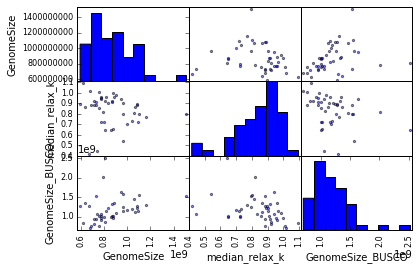

In [48]:
plotting.scatter_matrix(data2[['GenomeSize', 'median_relax_k', 'GenomeSize_BUSCO']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11831b110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118095550>]], dtype=object)

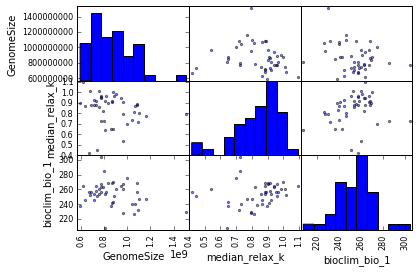

In [61]:
plotting.scatter_matrix(data2[['GenomeSize', 'median_relax_k', 'bioclim_bio_1']]) #this can be extended

In [63]:
from scipy import stats

In [65]:
annual_gen = data2[data2['Annual'] == 'Annual']['GenomeSize']
nannual_gen = data2[data2['Annual'] == 'NonAnnual']['GenomeSize']
stats.ttest_ind(annual_gen, nannual_gen)  

Ttest_indResult(statistic=nan, pvalue=nan)

In [66]:
clim_genA = data2[data2['KG1'] == 'A']['GenomeSize']
clim_genB= data2[data2['KG1'] == 'B']['GenomeSize']
stats.ttest_ind(clim_genA, clim_genB)  

Ttest_indResult(statistic=nan, pvalue=nan)

In [49]:
data3 = data2.ix[:, ['Annual', 'KG']]

In [50]:
data3
data4 = data2.ix[:,['GenomeSize', 'median_relax_k']]

,Annual,KG
0,SemiAnnual,Aw
1,SemiAnnual,Am
2,SemiAnnual,Aw
3,SemiAnnual,Aw
4,SemiAnnual,Am
6,NonAnnual,Af
10,NonAnnual,Aw
11,NonAnnual,Aw
12,NonAnnual,Am
13,NonAnnual,Am


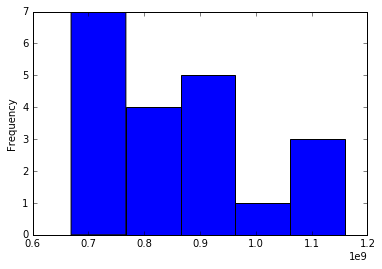

In [60]:
plt.figure();
data2[data2['KG'] == 'Aw']['GenomeSize'].plot.hist(stacked=True, bins=5)
#data2[data2['KG'] == 'BSh']['GenomeSize'].plot.hist(stacked=True, bins=5)

In [67]:
from statsmodels.formula.api import ols

In [106]:
model = ols("GenomeSize ~ bioclim_bio_11", data2).fit()

In [107]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             GenomeSize   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     7.797
Date:                Sun, 25 Feb 2018   Prob (F-statistic):            0.00785
Time:                        18:42:34   Log-Likelihood:                -893.73
No. Observations:                  44   AIC:                             1791.
Df Residuals:                      42   BIC:                             1795.
Df Model:                           1                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.649e+09   2.81e+08      5.859      0.000      1.08e+09  2.22e+09
bioclim_bio_11 -3.301e+06   1.18e+06    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1193a7710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a89c590>]], dtype=object)

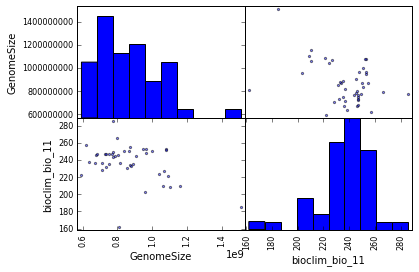

In [109]:
# The only factor that seem to barely correlate with genome size is bioclim_bio_11 - although not after Bonferroni correction
plotting.scatter_matrix(data2[['GenomeSize', 'bioclim_bio_11']]) #this can be extended

In [134]:
model = ols("median_relax_k ~ bioclim_bio_6", data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         median_relax_k   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     9.827
Date:                Sun, 25 Feb 2018   Prob (F-statistic):            0.00310
Time:                        18:48:14   Log-Likelihood:                 28.305
No. Observations:                  45   AIC:                            -52.61
Df Residuals:                      43   BIC:                            -49.00
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5087      0.107      4.762      0.000         0.293     0.724
bioclim_bio_6     0.0018      0.001      3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11847b150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ab96290>]], dtype=object)

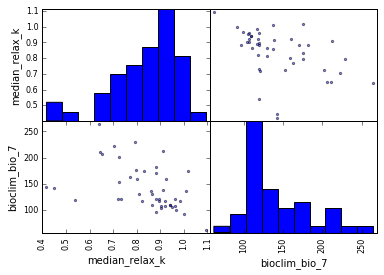

In [135]:
# The only factor that seem to barely correlate with relaxation indez is bioclim_bio_7 - even after Bonferroni correction
plotting.scatter_matrix(data2[['median_relax_k', 'bioclim_bio_7']]) #this can be extended

In [136]:
# bioclim_bio_7 is temperature annual range, the only parameter that correlates with median relaxation index